In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')

<ipython-input-14-c242cc7acb8e>:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')


In [ ]:

# Display the first few rows of the dataframe
print(df.head())


   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology,

In [ ]:
# Select relevant columns for employment insights analysis
employment_columns = ['Employment', 'CompanySize', 'YearsCoding', 'JobSatisfaction', 'CareerSatisfaction']

In [ ]:
# Filter the dataset with selected columns
employment_df = df[employment_columns]

In [ ]:
# Drop rows with missing values in target columns
employment_df = employment_df.dropna(subset=['JobSatisfaction', 'CareerSatisfaction'])

In [ ]:
# Display the first few rows of the filtered dataframe
print(employment_df.head())

           Employment               CompanySize       YearsCoding  \
0  Employed part-time        20 to 99 employees         3-5 years   
1  Employed full-time  10,000 or more employees  30 or more years   
2  Employed full-time        20 to 99 employees       24-26 years   
3  Employed full-time      100 to 499 employees       18-20 years   
4  Employed full-time  10,000 or more employees         6-8 years   

                      JobSatisfaction                  CareerSatisfaction  
0                 Extremely satisfied                 Extremely satisfied  
1             Moderately dissatisfied  Neither satisfied nor dissatisfied  
2                Moderately satisfied                Moderately satisfied  
3  Neither satisfied nor dissatisfied               Slightly dissatisfied  
4                  Slightly satisfied                Moderately satisfied  


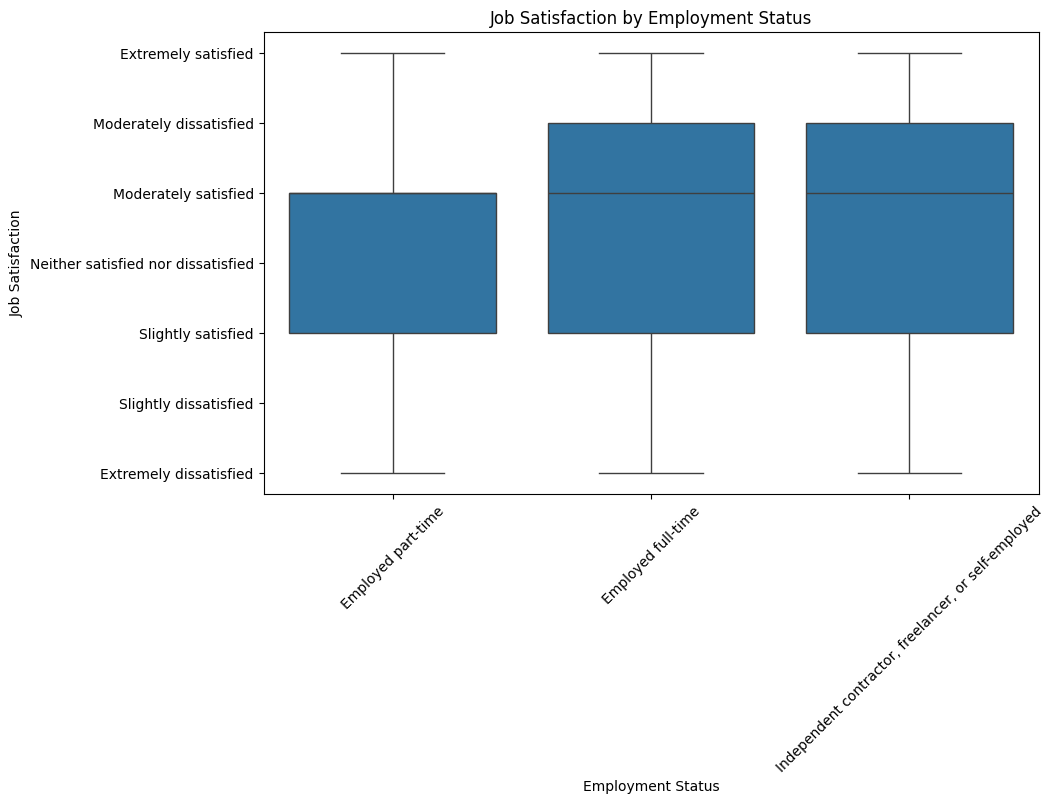

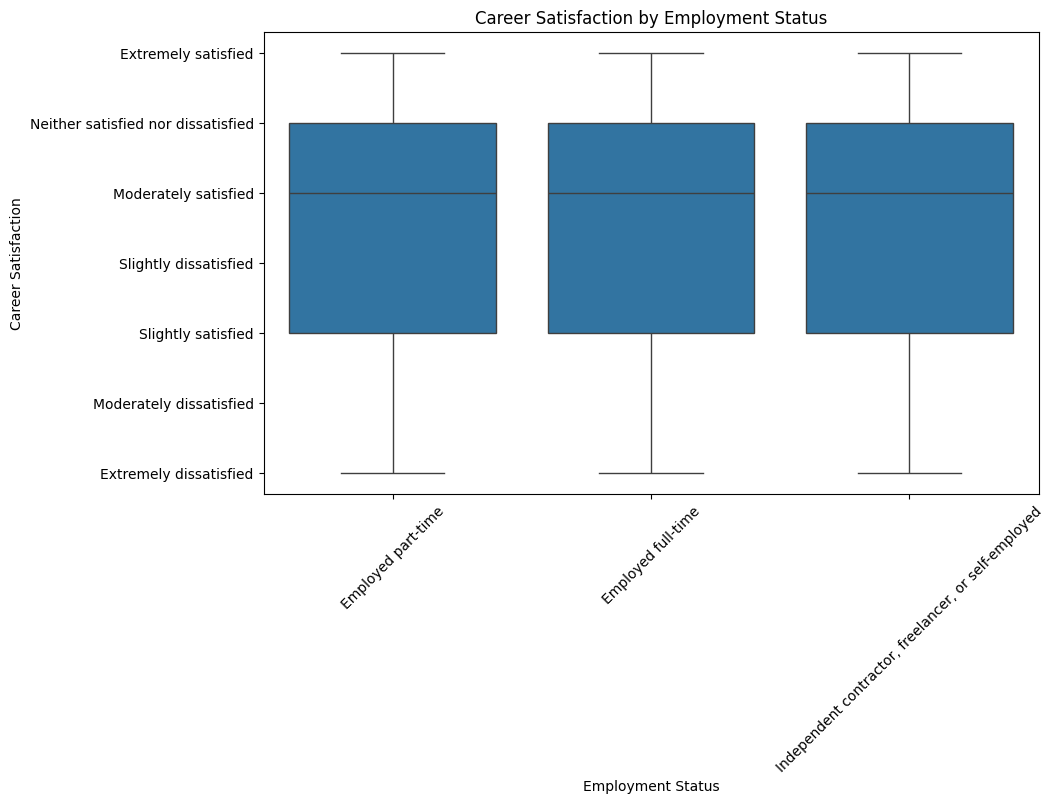

In [ ]:
# Function to plot satisfaction metrics
def plot_satisfaction_metric(column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=employment_df[column], y=employment_df['JobSatisfaction'])
    plt.title(f'Job Satisfaction by {title}')
    plt.xlabel(title)
    plt.ylabel('Job Satisfaction')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=employment_df[column], y=employment_df['CareerSatisfaction'])
    plt.title(f'Career Satisfaction by {title}')
    plt.xlabel(title)
    plt.ylabel('Career Satisfaction')
    plt.xticks(rotation=45)
    plt.show()

# Plot satisfaction metrics
plot_satisfaction_metric('Employment', 'Employment Status')



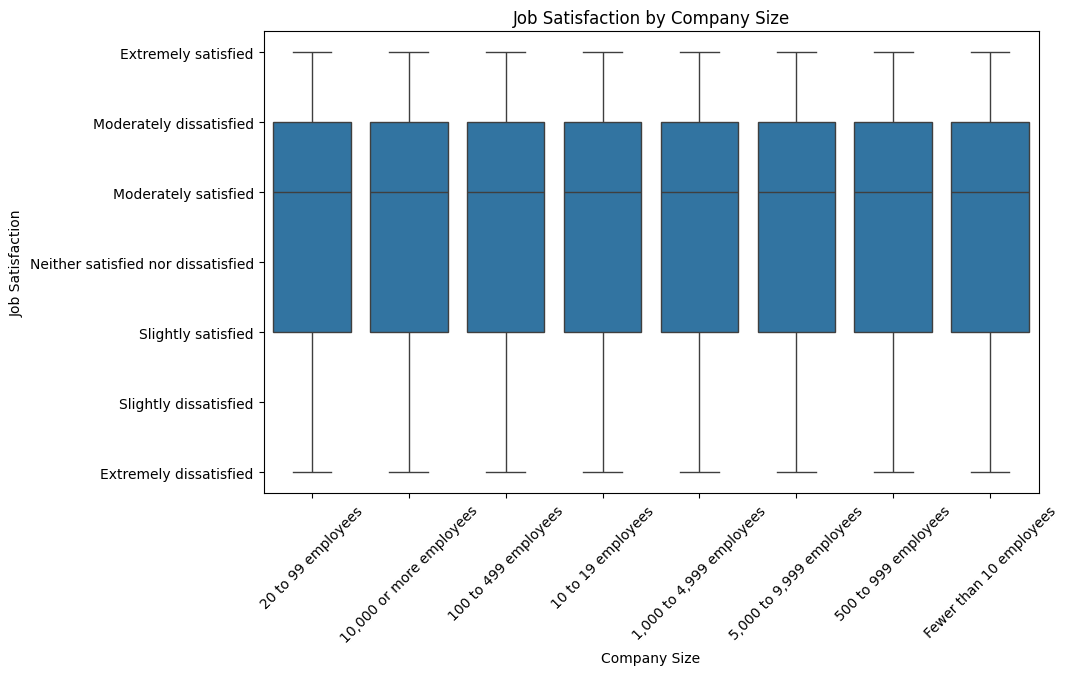

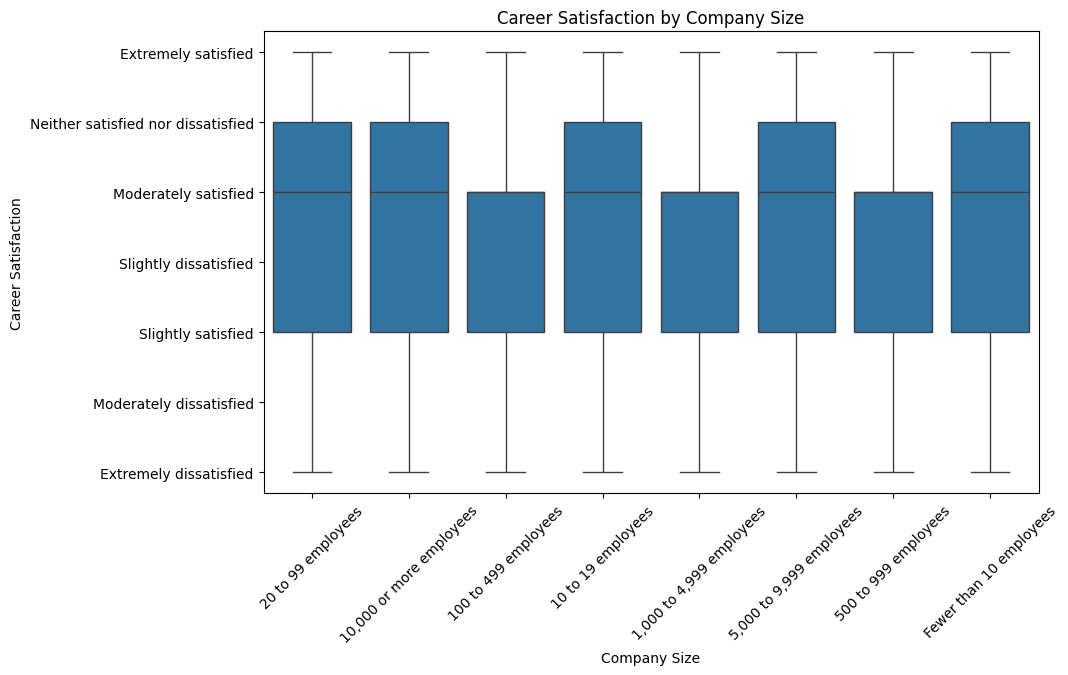

In [ ]:
plot_satisfaction_metric('CompanySize', 'Company Size')


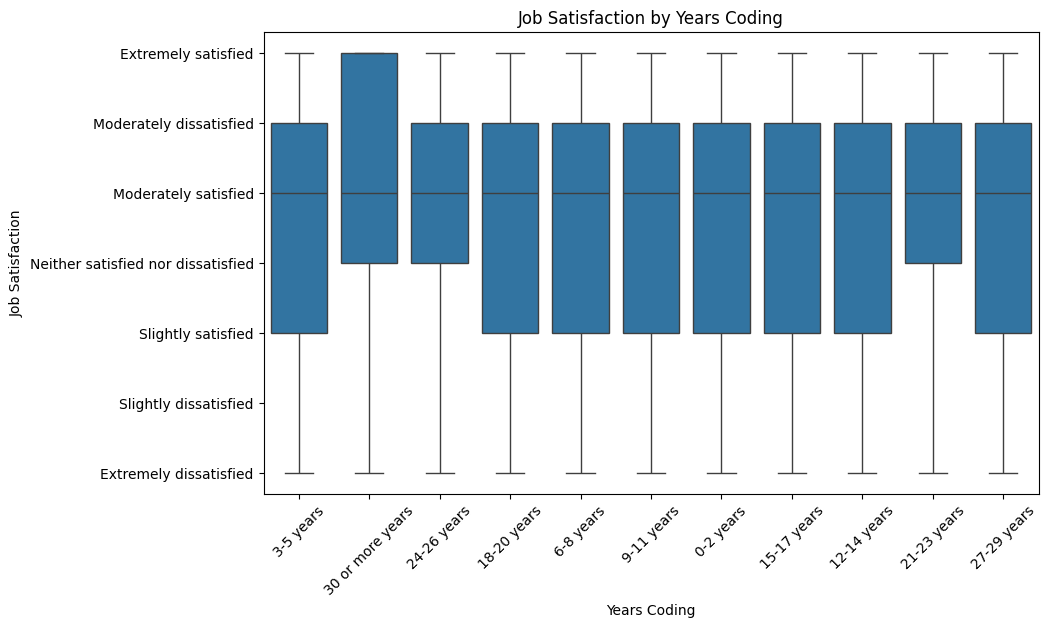

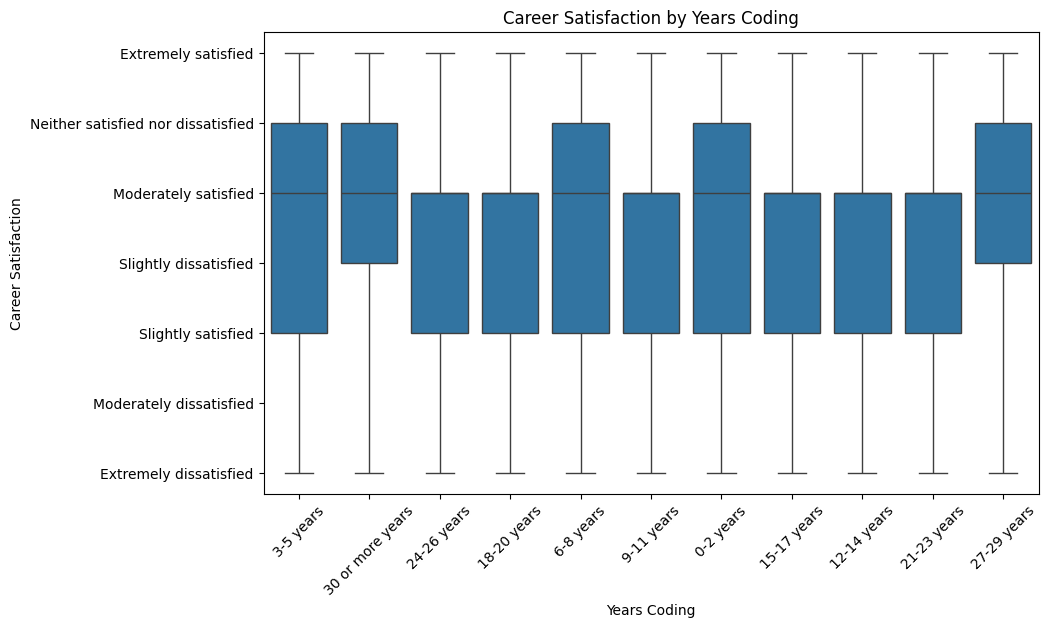

In [ ]:
plot_satisfaction_metric('YearsCoding', 'Years Coding')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [ ]:
# Select features and target for Job Satisfaction prediction
X = employment_df[['Employment', 'CompanySize', 'YearsCoding']]
y_job = employment_df['JobSatisfaction']



In [ ]:
# Preprocessing pipelines for numerical and categorical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns



In [ ]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [ ]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_job, test_size=0.2, random_state=42)

# Create and fit the pipeline with Logistic Regression
model_job = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

model_job.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Employment', 'CompanySize', 'YearsCoding'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Make predictions
y_pred_job = model_job.predict(X_test)



In [ ]:
# Evaluate the model
print('Job Satisfaction Prediction')
print('Accuracy:', accuracy_score(y_test, y_pred_job))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_job))
print('Classification Report:')
print(classification_report(y_test, y_pred_job))



Job Satisfaction Prediction
Accuracy: 0.3756495381062356
Confusion Matrix:
[[   0    0    0  497    0    0    0]
 [   0    0    0 2459    0    0    0]
 [   0    0    0 1278    0    0    0]
 [   0    0    0 5205    0    0    0]
 [   0    0    0 1043    0    0    0]
 [   0    0    0 1406    0    0    0]
 [   0    0    0 1968    0    0    0]]
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                    precision    recall  f1-score   support

            Extremely dissatisfied       0.00      0.00      0.00       497
               Extremely satisfied       0.00      0.00      0.00      2459
           Moderately dissatisfied       0.00      0.00      0.00      1278
              Moderately satisfied       0.38      1.00      0.55      5205
Neither satisfied nor dissatisfied       0.00      0.00      0.00      1043
             Slightly dissatisfied       0.00      0.00      0.00      1406
                Slightly satisfied       0.00      0.00      0.00      1968

                          accuracy                           0.38     13856
                         macro avg       0.05      0.14      0.08     13856
                      weighted avg       0.14      0.38      0.21     13856



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Select features and target for Career Satisfaction prediction
y_career = employment_df['CareerSatisfaction']



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_career, test_size=0.2, random_state=42)



In [ ]:
# Create and fit the pipeline with Logistic Regression
model_career = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

model_career.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Employment', 'CompanySize', 'YearsCoding'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Make predictions
y_pred_career = model_career.predict(X_test)

# Evaluate the model
print('Career Satisfaction Prediction')
print('Accuracy:', accuracy_score(y_test, y_pred_career))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_career))
print('Classification Report:')
print(classification_report(y_test, y_pred_career))

Career Satisfaction Prediction
Accuracy: 0.374566974595843
Confusion Matrix:
[[   0    0    0  439    0    0    0]
 [   0    0    0 2653    0    0    0]
 [   0    0    0  948    0    0    0]
 [   0    0    0 5190    0    0    0]
 [   0    0    0  969    0    0    0]
 [   0    0    0 1189    0    0    0]
 [   0    0    0 2468    0    0    0]]
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                    precision    recall  f1-score   support

            Extremely dissatisfied       0.00      0.00      0.00       439
               Extremely satisfied       0.00      0.00      0.00      2653
           Moderately dissatisfied       0.00      0.00      0.00       948
              Moderately satisfied       0.37      1.00      0.54      5190
Neither satisfied nor dissatisfied       0.00      0.00      0.00       969
             Slightly dissatisfied       0.00      0.00      0.00      1189
                Slightly satisfied       0.00      0.00      0.00      2468

                          accuracy                           0.37     13856
                         macro avg       0.05      0.14      0.08     13856
                      weighted avg       0.14      0.37      0.20     13856



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
